# Employment Exit Survey Analysis

The purpose of this project is to answer questions pertaining to the resignment reasons for long and short term employees. The data we will be working with is exit surveys from the Department of Education, Training and Employment (DETE) as well as those from Technical and Further Education (TAFE). While we work with the data, we will continuously be asking ourselves which data do we need to answer the task? Is the data present already? How can we transform the existing data to help us answer resignment quetsions.

## Question: 
- Are employees whop only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

## Importing Libraries, Reading in Data and Begin Exploration

In [2]:
#Import the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Read in the CSV files
dete_survey = pd.read_csv('dete_survey.csv', encoding='cp1252')
tafe_survey = pd.read_csv('tafe_survey.csv', encoding='cp1252')

#Begin to Explore Data information
print("DETE INFORMATION", '\n')
dete_survey.info()
print('\n')
dete_survey.head(5)
print('\n')
print('NULL VALUES','\n')
dete_survey.isnull().sum()


DETE INFORMATION 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sec

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [3]:
# print("TAFE INFORMATION", '\n')
# tafe_survey.info()
# print('\n')
# tafe_survey.head(5)
# print('\n')
# print('NULL VALUES','\n')
# tafe_survey.isnull().sum()

## Initial  Observations

DETE Survey:
- 822 ideally filled entries
- Several columns with null entries. Many of which are unrelated to employee satisfaction and are up for consideration to be dropped
- int,string and bool type entries
- Non-entries entered as "Not Stated"
- Interested to clean data pertaining to resignation reason as well as the employees years of service with the institute

TAFE Survey:
- 702 ideally filled entries
- explicit columns detailing dissatisfaction. ('Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction')
- Many similar columns to DETE survey though under a different column title (i.e. 'id' vs 'Record id')
- float and object data types
- Interested to clean data pertaining to resignation reason as well as the employees years of service with the institute.



## Removing Columns

Our main goal is to find out why employees are leaving due to some sort of dissatisfaction. Therfore we are really only interested in the information present in the file that relates to this question. The code block below removes several columns from each data set that are not useful to use. This will also help reduce the number of null entries in the data sets.

In [4]:
#Re-read dete survey, convert "Not Stated" to NaN values
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

#drop columns not needed for the analysis - DETE SURVEY
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

#drop columns not needed for the analysis - TAFE SURVEY
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)


## Normalizing Important Column Names

The column names from the DETE survey are more simular to what we are used to seeing in Python. A simple string function can replace spaces with an underscore "_" and the columns names will be in snake case. Snake case is easier for people to read and will hopeful lead to less mistakes in the code as well as quicker code development.

We will use the same format from the updated DETE survey column names for the TAFE survey as well. The code below creates a dictionary to be used to map the existing column name (the key in the dictionary) to its new column title (the value in the dictionary). The DETE column names were consulted to try and match and similar columns between the two to have the same column title. This will make joining the two data sets easier later on.

In [5]:
#Re-name column names - DETE Survey
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(" ","_").str.rstrip()
print(dete_survey_updated.columns)
print('\n')

#Re-name column names - DETE Survey
tafe_columns_name_map = {
    'Record ID':'id',
    'CESSATION YEAR':'cease_date',
    'Reason for ceasing employment':'separationtype',
    'Gender. What is your Gender': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
}

tafe_survey_updated.rename(tafe_columns_name_map, inplace=True, axis=1)
print(tafe_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employm

## Honing in on Resignation Information

As a reminder, we are interesting in if an employee resigned due to some sort of dissatisfaction. To begin cleaning the data to answer this question, we will first isolate the data from which an employee did resign (as oposed to retiring, injury, etc.). To do this a regular expression (regex) "pattern" was created. This regex is used to create bool series' from each data frame, returning TRUE of an entry contained the regex. New data frames, 'dete_resignations' and 'tafe_resignations' were created that only contain entries if the original entry under the 'separationtype' column contained the word Resignation.

In [19]:
#Create regex to use as search pattern
pattern = r"Resignation"
search_bool_dete = dete_survey_updated['separationtype'].str.contains(pattern)
search_bool_tafe = tafe_survey_updated['separationtype'].str.contains(pattern, na=False)

# The code below is used to verify that the above search bools did infact only extract rows from each containing "Resignation" as their separation type

# print(search_bool.head(5))
# print(dete_survey_updated.loc[2:3,'separationtype'])
# print(search_bool_tafe.head(5))
# print(tafe_survey_updated.loc[2:4,'separationtype'])

#View Unique Entries for Resignation from each dataframe
resignation_dete = dete_survey_updated.loc[search_bool_dete,"separationtype"].value_counts()
resignation_tafe = tafe_survey_updated.loc[search_bool_tafe,"separationtype"].value_counts()
print("DETE RESIGNATIONS","\n")
print(resignation_dete)
print("TAFE RESIGNATIONS","\n")
print(resignation_tafe)

# Create new data frames only containing all columns of entries who resigned
dete_resignations = dete_survey_updated[search_bool_dete].copy()
tafe_resignations = tafe_survey_updated[search_bool_tafe].copy()


DETE RESIGNATIONS 

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64
TAFE RESIGNATIONS 

Resignation    340
Name: separationtype, dtype: int64


## Years of Service: Institute_Service

Now that we have separated the resignation entries from the rest of the data set, we can now begin to gather information from each data set pertaining to how long an employee worked with the institute. We begin by printing the unique values for 'cease_date' from the 'dete_resignations' dataframe. We see that some entries are just the years of resignation and some contain the month data as well. We then create a regex to extract and replace each value in the resignation column with just the year information from each entry. As this new value will only contain four numbers, we can now type cast this to a float data type so that we can manipulate the column with mathematical expressions later.

A similar process is done for the TAFE data, however this data set already contains a column oultining years of service. A series of string operations were used to remove unwanted information from this column. This column contains ranges (i.e. 7-10 years of service). The mean of this data range rounded up to the nearest whole number is used to replace this information.

In [20]:
#creates a series object of unique cease_dates 
dete_cease_dates = dete_resignations['cease_date'].value_counts(dropna=False)
print(dete_cease_dates)
print(dete_cease_dates.sum())

#creates a search pattern to look for only the year from the cease_date column (regex)
cease_date_pattern = r"([1-2][0-9]{3})"

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64
311


In [8]:
#creates a new series of the cease_dates but only extracts the year value from each using the search pattern
cease_date_years = dete_resignations['cease_date'].str.extract(cease_date_pattern)

#replaces original cease_date column with just their years
dete_resignations['cease_date'] = cease_date_years.astype('float')
print(dete_resignations['cease_date'].value_counts(dropna=False))
print("Total Entries:", "\n")
print(dete_resignations['cease_date'].value_counts(dropna=False).sum())


2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64
Total Entries: 

311


In [9]:
dete_start_dates = dete_resignations['dete_start_date'].value_counts()
dete_cease_dates = dete_resignations['cease_date'].value_counts()
tafe_cease_dates = tafe_resignations['cease_date'].value_counts()

# print("TAFE CEASE DATES:","\n")
# print(tafe_cease_dates.sort_index(ascending=True))
# print("DETE START DATES:","\n")
# print(dete_start_dates.sort_index(ascending=True))
# print("DETE CEASE DATES:","\n")
# print(dete_cease_dates.sort_index(ascending=True))

In [10]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


In [11]:
# CLEAN INSTITUTE SERVICE COLUMN IN TAFE DATA

#clean More then / less than / year / years
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].str.replace("More than ","")
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].str.replace("Less than ","")
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].str.replace(" years","")
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].str.replace(" year","")

#For years with ranges. Replace '-' with a space. Split at the space into a list of 2 strings
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].str.replace("-"," ")
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].str.split() 

#convert strings in lists to floats and store them as individual numbers
tafe_service_first = tafe_resignations['institute_service'].str[0].astype('float')
tafe_service_second = tafe_resignations['institute_service'].str[-1].astype('float')

#replace values of institute service in TAFE data with the average of the range
tafe_resignations['institute_service'] = round(((tafe_service_first + tafe_service_second)/2),0)
tafe_resignations.head(5)


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 – 45,Permanent Full-time,Teacher (including LVT),4.0,3-4
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),8.0,7-10
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),4.0,3-4
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 – 50,Permanent Full-time,Teacher (including LVT),4.0,3-4


## Data Transformation - Dissatisfied Employees

We now have;
- created new data frames with just the entries of employees who resigned
- clean the 'cease_dates' and 'start_date' information from each data set and created a new column in each to store the employees years of service ('institute_service')

We now need to represent explicitely whether an employee was dissatisfied. We will do this with the steps below;
- create list of column headers for each dataframe that would indicate whether an employee was dissatisfied. ('dissat_cols')
- create a function 'update_vals', pass the dissat_cols of each dataframe to it. The function will replace original values in the dissat_cols with True/False.
- Created new columns 'Dissatisfied' in each dataframe.
- populated the newly created 'dissatisfied' column with true if any of the dissat_cols were marked true

We note that the DETE dataframe already already contains only true/false for it's dissat_cols.

In [12]:
#Define lists of columns in each dataframe indicating employee dissatifaction
tafe_dissat_cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
dete_dissat_cols = ['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']

def update_vals(cols):
    if pd.isnull(cols):
        return np.nan
    elif cols == '-':
        return False
    else:
        return True
    
tafe_resignations[tafe_dissat_cols] = tafe_resignations[tafe_dissat_cols].applymap(update_vals)

#Create New Bool column "Dissatisfied"
#True of any of the dissat_cols = True.
dete_resignations['dissatisfied'] = dete_resignations[dete_dissat_cols].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dissat_cols].any(axis=1, skipna=False)

dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

#DETE cols are already bool values. No need to alter

## Combining Data

Finally, we have cleaned all the data we need to in order to answer the question outlined at the start of this document. We will now join the two data sets together in order to answer the question using both serveys.

We will use the pd.concat() method join the two dataframes vertically. Any like columns (i.e. 'id' and 'institute_service') will not be duplicated. All other columns will be kept, therfore created many entries with NULL values for the other dataframe. We will keep all entries with less than 500 null values.

In [26]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up,tafe_resignations_up], axis=0, ignore_index=True)
combined_updated = combined.dropna(axis=1, thresh=500)
combined_updated.head(10)


,id,separationtype,cease_date,institute_service,dissatisfied,institute
0,4,Resignation-Other reasons,2012.0,7.0,False,DETE
1,6,Resignation-Other reasons,2012.0,18.0,True,DETE
2,9,Resignation-Other reasons,2012.0,3.0,False,DETE
3,10,Resignation-Other employer,2012.0,15.0,True,DETE
4,12,Resignation-Move overseas/interstate,2012.0,3.0,False,DETE
5,13,Resignation-Other reasons,2012.0,14.0,False,DETE
6,15,Resignation-Other employer,2012.0,5.0,True,DETE
7,17,Resignation-Other reasons,2012.0,NaN,True,DETE
8,21,Resignation-Other employer,2012.0,30.0,False,DETE
9,22,Resignation-Other reasons,2012.0,32.0,False,DETE


In [22]:
institute_service = combined['institute_service'].value_counts(dropna=False)
institute_service.head(10)

1.0     95
NaN     88
4.0     79
2.0     78
6.0     50
16.0    31
8.0     29
5.0     23
3.0     20
0.0     20
Name: institute_service, dtype: int64

## Data Transformation - Categorize Years of Service

To make the data easier to visualize, we will create a function to categorize an employees years of service with the institute. A mapping function is developed to convert values in the 'combined' dataframe's institute_service column into a string. The returned value is stored in a new column called 'cat_service' for 'categorized institute_service'.

- if institute_service < 3 years --> return "New"
- if 3 < institute_service < 6 years --> return "Experienced"
- if 7 < institute_service < 10 years --> return "Established"
- if institute_service > 10 years --> return "Veteran"

These new buckets will make it easy to aggregate the data based off of employee experience levels.

In [15]:
def map_service(col):
    if pd.isnull(col):
        return np.nan
    elif (col<3):
        return "New"
    elif (3<=col<=6):
        return "Experienced"
    elif (7<=col<=10):
        return "Established"
    else:
        return "Veteran"
    
combined['service_cat'] = combined['institute_service'].apply(map_service)  

In [16]:
#Check Dissatisfied Column for NaN or other values
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
True       8
Name: dissatisfied, dtype: int64

In [17]:
#Convert NaN values to the most frequently occuring value in the column
combined['dissatisfied']=combined['dissatisfied'].fillna(False)
combined['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

## Visualize the Data

Finally we use the df.pivot_table() method to aggregate the data based off of employee experience. We will use the 'service_cat' column as the pivot table index's and the 'dissatisfied' column as the columns. The default aggregate function for the .pivot_table() method is np.mean() and therefore the data corresponding to the index's in the pivot table will represent the average dissatifaction amongst all employees who resigned in that experience level category. 

We then plot the data in a bar graph to help visualize the results.

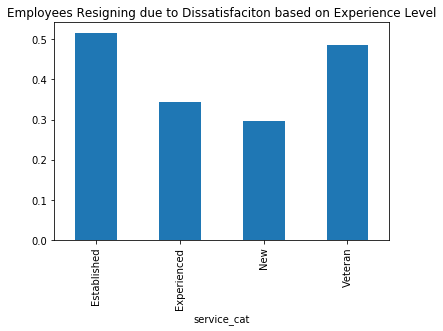

In [18]:
service_cat_pv = combined.pivot_table(index='service_cat', values='dissatisfied')
service_cat_pv.plot(kind='bar', title='Employees Resigning due to Dissatisfaciton based on Experience Level',legend=False)

# Conclusion
From the plot above, it can be seen that the majority of employees who have resigned due to some sort of dissatisfaction appears to be of the top two experience level categories. This would suggest that the longer an employee works for the institute, the more likely their resignation reason is to be of some sort of dissatisfaction. Furthermore, it appears as though approximately 30% of less experienced employees (in the "experienced" and "new") categories, are resigning due to some sort of dissatisfaction. This may suggest that a more significant reason for new employees to resign is as a result of some external factor.